#### 그림, 실습코드 등 학습자료 출처 : https://datascienceschool.net

- 문제 : price는 가격을 나타내고, food, decor, service 열은 각각 음식, 데코, 서비스를 평가한 점수이며 east는 위치를 나타내는 더미변수이다. 이 데이터를 대상으로 다음 문제를 풀어라. 유의수준은 5%로 한다.

In [13]:
# 필요한 패키지 임포트
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
# 데이터로드
df0 = pd.read_csv("http://gattonweb.uky.edu/sheather/book/docs/datasets/nyc.csv", encoding='latin1')
del df0["Case"]
df0.tail()

,Restaurant,Price,Food,Decor,Service,East
163,Baci,31,17,15,16,0
164,Puccini,26,20,16,17,0
165,Bella Luna,31,18,16,17,0
166,Métisse,38,22,17,21,0
167,Gennaro,34,24,10,16,0


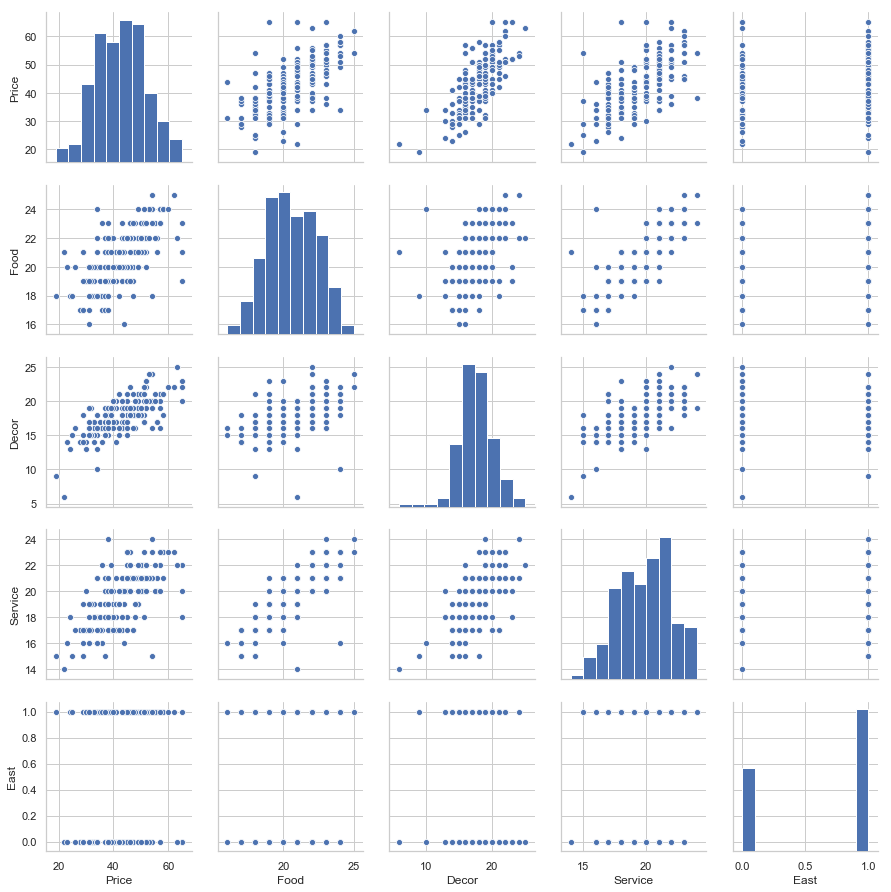

In [15]:
# 데이터 분포 확인
sns.pairplot(df[['Price','Food','Decor','Service','East']])
plt.show()

#### 1. 다른 변수들을 사용하여 가격을 예측하는 선형회귀모형을 만들어라.

In [16]:
# 독립변수외 상수항 추가
df = sm.add_constant(df0[['Food','Decor','Service','East']])

model = sm.OLS(df0[['Price']], df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           5.35e-34
Time:                        12:46:31   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.0238      4.708     -5.102      0.0

#### 2. Food, Decor,Service 중에서 가격에 가장 크게 영향을 미치는 변수는 무엇인가? 이 변수는 통계적으로 유의한가

- 정답 : Decor 변수가 가장 크게 영향을 미친다. 유의확률 또한 1% 미만으로 통계적으로도 유의하다고 할 수 있다.

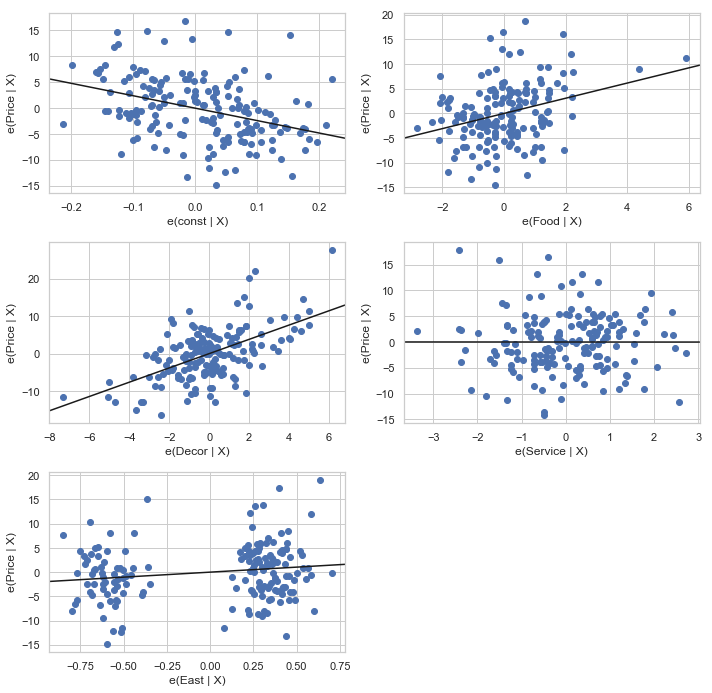

In [17]:
fig = plt.figure(figsize=(10, 10))
sm.graphics.plot_partregress_grid(result, fig=fig)
fig.suptitle("")
plt.show()

#### 3. 식당의 위치는 가격에 영향을 미치는가? 만약 영향을 미친다면 East의 식당은 West 식당대비 어느정도 비싸다고 말 할 수 있는가?

- 정답 : East의 유의확률은 약 3%이므로 유의하다. 즉 위치는 가격에 영향을 미친다. 유의수준 5%에서 약 0.2 ~ 3.9 달러 비싸다는 것을 알 수 있다.

#### 4. 통계적으로 유의하지 않은 변수는 무엇인가?

- 정답 : service 변수가 유의하지 않은 변수이다.

#### 5. 통계적으로 유의하지 않은 변수를 제외하고 다시 모형을 만들어 결과를 비교하라

In [19]:
model2 = sm.OLS(df0[['Price']], (df[['Food','Decor','East']]))
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2775.
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          6.49e-141
Time:                        12:49:38   Log-Likelihood:                -541.91
No. Observations:                 168   AIC:                             1090.
Df Residuals:                     165   BIC:                             1099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Food           0.4913      0.180      2.735      0.0

#### 6. Food = 20, Decor = 20, Service = 20, East = 1인 식당의 가격을 예측하라

In [21]:
x_new = pd.DataFrame({'const':[1],'Food':[20],'Decor':[20],'Service':[20],'East':[1]})
result.predict(x_new)

0    46.953842
dtype: float64

#### 7. 모형2를 이용하여 아웃라이어인 식당을 구하라.

In [23]:
idx = result2.resid_pearson > 2
df0[idx]

,Restaurant,Price,Food,Decor,Service,East
29,Harry Cipriani,65,21,20,20,1
44,Bravo Gianni,56,22,17,21,1
47,Il Valletto Due Mila,56,21,17,20,1
55,Nello,54,18,16,15,1
102,Rao's,57,23,16,20,1
129,Rainbow Grill,65,19,23,18,0
131,San Domenico,65,23,22,22,0


In [24]:
PricePredicted = result2.predict(df[['Food', 'Decor', 'East']])

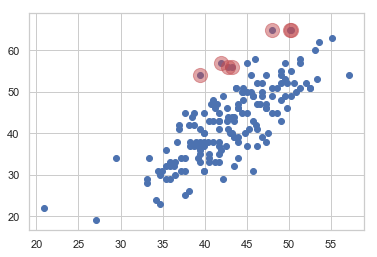

In [27]:
plt.scatter(PricePredicted, df0.Price)
plt.scatter(PricePredicted[idx], df0[idx].Price, s=200, c='r', alpha=0.5)
plt.show()

#### 8. 모형 2를 이용하여 레버리지가 큰 데이터를 구하라. 추가적으로 (레버리지가 평균 레버리지의 3배 이상) 이 데이터를 스캐터 플롯상에 시각화할것

In [28]:
influence = result2.get_influence()
h = influence.hat_matrix_diag
idx = h > 3 * h.mean()
df0[idx]

,Restaurant,Price,Food,Decor,Service,East
116,Veronica,22,21,6,14,0
129,Rainbow Grill,65,19,23,18,0
144,Palio,63,22,25,22,0
167,Gennaro,34,24,10,16,0


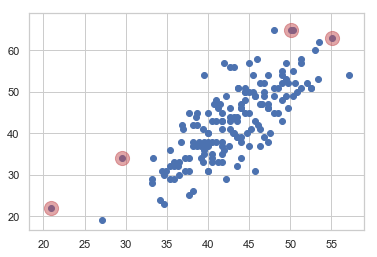

In [29]:
plt.scatter(PricePredicted, df0.Price)
plt.scatter(PricePredicted[idx], df0[idx].Price, s=200, c='r', alpha=0.5)
plt.show()

#### 9. 모형 2를 이용하여 'Cook's distance'가 큰 데이터를 구하라. 추가적으로 (Fox' Outlier Recommendation 사용) 이 데이터를 스캐터 플롯에 시각화 할것

In [30]:
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df0) - 4 - 1)
idx = cooks_d2 > fox_cr
df0[idx]

,Restaurant,Price,Food,Decor,Service,East
29,Harry Cipriani,65,21,20,20,1
102,Rao's,57,23,16,20,1
108,Casa Mia,31,20,19,19,1
114,Lamarca,19,18,9,15,1
129,Rainbow Grill,65,19,23,18,0
131,San Domenico,65,23,22,22,0
138,Rino Trattoria,23,20,14,16,0
140,Trattoria Del Sogno,29,21,18,19,0
144,Palio,63,22,25,22,0
151,Il Tinello,57,23,19,23,0


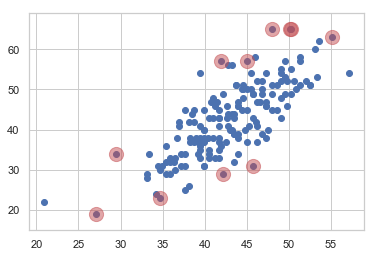

In [31]:
plt.scatter(PricePredicted, df0.Price)
plt.scatter(PricePredicted[idx], df0[idx].Price, s=200, c='r', alpha=0.5)
plt.show()